# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['jamestown',
 'airai',
 'verkh-chebula',
 'sarangani',
 'hobart',
 'arys',
 'mataura',
 'tuktoyaktuk',
 'moses lake',
 'rikitea',
 'pundaguitan',
 'bijie',
 'busselton',
 'sambava',
 'taolanaro',
 'hilo',
 'ushuaia',
 'mount gambier',
 'new norfolk',
 'beysehir',
 'kahului',
 'cidreira',
 'kurumkan',
 'alice springs',
 'thompson',
 'vaini',
 'hermanus',
 'saint-pierre',
 'labutta',
 'hithadhoo',
 'arraial do cabo',
 'seoul',
 'okhotsk',
 'nikolskoye',
 'nizhneangarsk',
 'ribeira grande',
 'saint-philippe',
 'mys shmidta',
 'sioux lookout',
 'constitucion',
 'tura',
 'rio gallegos',
 'nosy varika',
 'saskylakh',
 'te anau',
 'punta arenas',
 'umm kaddadah',
 'acapulco',
 'ambilobe',
 'katsuura',
 'port alfred',
 'qaanaaq',
 'sungai padi',
 'illoqqortoormiut',
 'qasigiannguit',
 'belaya gora',
 'meulaboh',
 'cape town',
 'isangel',
 'georgetown',
 'lebu',
 'kapaa',
 'xingcheng',
 'hambantota',
 'padang',
 'mahebourg',
 'methoni',
 'rocha',
 'sundargarh',
 'tual',
 'inirida',
 'port linc

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [152]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 1
setnumb = 1
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        print(f"Processing Record {citynumb} of Set {setnumb} | {city}")
        citynumb += 1
        
        if citynumb == 50:
            setnumb += 1 
            citynumb = 1
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')
        #pass

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | verkh-chebula
Processing Record 4 of Set 1 | sarangani
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | arys
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | moses lake
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | pundaguitan
Processing Record 12 of Set 1 | bijie
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | sambava
City not found. Skipping...
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | beysehir
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | kurumkan
Processing Record 23 of Set 1 | alice springs
Processing Record 24 of Set 1 

Processing Record 44 of Set 4 | vanavara
Processing Record 45 of Set 4 | vitim
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | barra
Processing Record 48 of Set 4 | kananga
Processing Record 49 of Set 4 | pisco
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | mandalgovi
Processing Record 6 of Set 5 | petrovsk-zabaykalskiy
Processing Record 7 of Set 5 | kysyl-syr
Processing Record 8 of Set 5 | peniche
Processing Record 9 of Set 5 | buesaco
Processing Record 10 of Set 5 | muros
Processing Record 11 of Set 5 | monforte de lemos
Processing Record 12 of Set 5 | sabang
Processing Record 13 of Set 5 | torbay
Processing Record 14 of Set 5 | laguna
Processing Record 15 of Set 5 | dilla
City not found. Skipping...
Processing Record 16 of Set 5 | certaldo
Processing Record 17 of Set 5 | marabba
Processing Record 18 of Set 5 | pombos
Processi

Processing Record 38 of Set 8 | tocopilla
Processing Record 39 of Set 8 | santa catarina de tepehuanes
Processing Record 40 of Set 8 | urdoma
Processing Record 41 of Set 8 | tak
Processing Record 42 of Set 8 | san jeronimo
City not found. Skipping...
Processing Record 43 of Set 8 | cravo norte
Processing Record 44 of Set 8 | werda
Processing Record 45 of Set 8 | poum
Processing Record 46 of Set 8 | mocuba
Processing Record 47 of Set 8 | celestun
Processing Record 48 of Set 8 | ostrovnoy
City not found. Skipping...
Processing Record 49 of Set 8 | mugur-aksy
Processing Record 1 of Set 9 | znamenskoye
Processing Record 2 of Set 9 | tungor
Processing Record 3 of Set 9 | gboko
Processing Record 4 of Set 9 | linden
Processing Record 5 of Set 9 | nikolsk
City not found. Skipping...
Processing Record 6 of Set 9 | njombe
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 9 | muzhi
Processing Record 8 of Set 9 | skibbereen
Processing Record 9 of Set 9 | bardiyah
C

Processing Record 28 of Set 12 | aksarka
Processing Record 29 of Set 12 | gusoeni
Processing Record 30 of Set 12 | yinchuan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloud, 'Wind Speed (mph)':wind_speed, 'Country':country, 'Date':date_w})
cities_df.head(20)

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,jamestown,42.0970,-79.2353,33.80,47,1,6.91,US,1612481333
1,airai,-8.9266,125.4092,62.98,100,100,3.83,TL,1612481396
2,verkh-chebula,56.0308,87.6218,5.22,94,98,8.61,RU,1612481484
3,sarangani,5.4033,125.4636,81.84,78,77,19.10,PH,1612481418
4,hobart,-42.8794,147.3294,71.60,78,75,5.75,AU,1612481310
5,arys,42.4252,68.7950,35.60,75,0,8.95,KZ,1612481485
6,mataura,-46.1927,168.8643,68.94,47,51,3.42,NZ,1612481406
7,tuktoyaktuk,69.4541,-133.0374,-34.60,74,75,12.66,CA,1612481409
8,moses lake,47.1301,-119.2781,51.80,43,1,10.36,US,1612481485
9,rikitea,-23.1203,-134.9692,78.85,68,97,10.94,PF,1612481114


In [110]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [111]:
clean_cities_df = cities_df[(cities_df['Humidity (%)'] <= 100)]
# print(f"Original Cities Data Frame count is: {cities_df['City'].count()}.")
# print(f"Cleaned Cities Data Frame count is: {clean_cities_df['City'].count()}.")

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


In [112]:
#  Get the indices of cities that have humidity over 100%.


In [113]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [134]:
#Built in function to create scatter plots
def scatter_only(x_axis, y_axis):
    #First argument is x axis and second is y axis.
    #Scatter Plot
    plt.scatter(x_axis, y_axis, marker="o", facecolors='red', edgecolors="black")
    plt.title(f"{y_axis.name} vs. {x_axis.name} Plot")
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

## Latitude vs. Temperature Plot

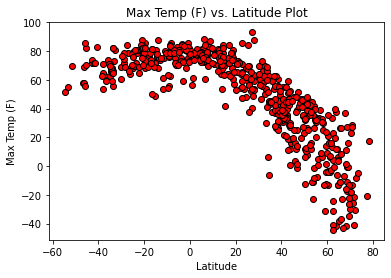

In [135]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'])

## Latitude vs. Humidity Plot

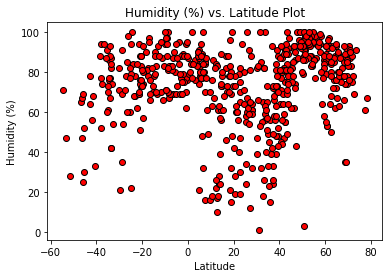

In [136]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Humidity (%)'])


## Latitude vs. Cloudiness Plot

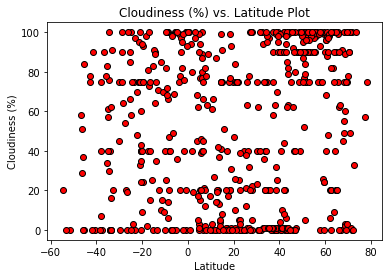

In [137]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Cloudiness (%)'])

## Latitude vs. Wind Speed Plot

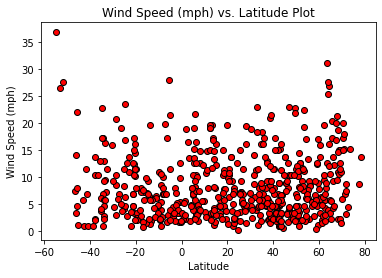

In [138]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Wind Speed (mph)'])

## Linear Regression

In [139]:
#Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
southern_hemisphere_cities_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
1,airai,-8.9266,125.4092,62.98,100,100,3.83,TL,1612481396
4,hobart,-42.8794,147.3294,71.60,78,75,5.75,AU,1612481310
6,mataura,-46.1927,168.8643,68.94,47,51,3.42,NZ,1612481406
9,rikitea,-23.1203,-134.9692,78.85,68,97,10.94,PF,1612481114
12,busselton,-33.6500,115.3333,55.99,82,0,16.37,AU,1612481411


In [140]:
#Built in function to create scatter plot and linear regression
def scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    #Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression)")
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    #Linear Regression
    x = ((x_axis.mean())-5)
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

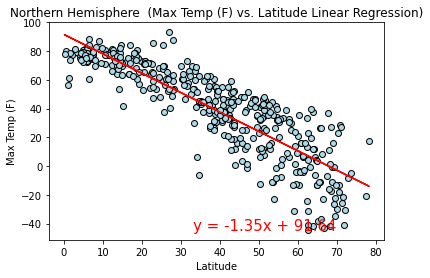

In [141]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], 0, 0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

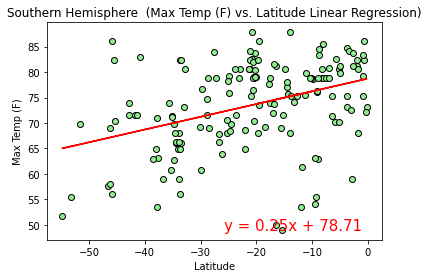

In [142]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], 1, 1)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

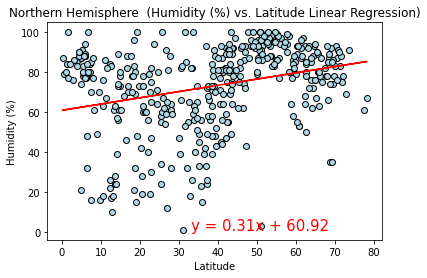

In [143]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity (%)'], 0, 0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

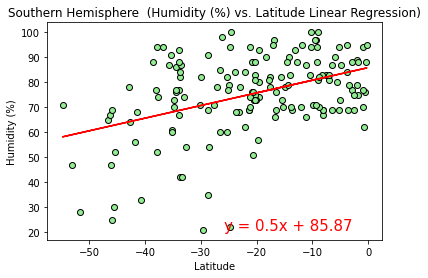

In [144]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity (%)'], 1, 1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

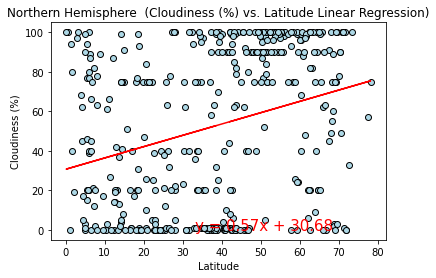

In [145]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Cloudiness (%)'], 0, 0)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

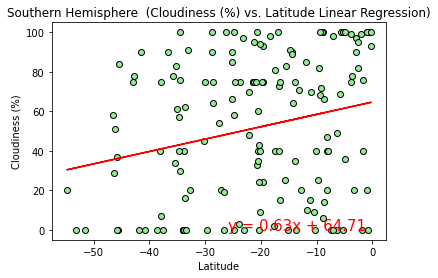

In [146]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Cloudiness (%)'], 1, 1)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

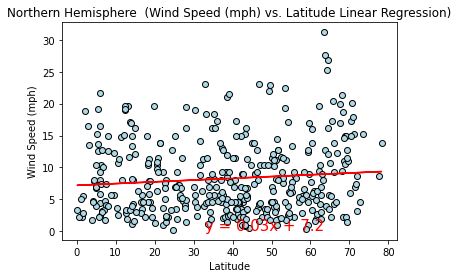

In [147]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Wind Speed (mph)'], 0, 0)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

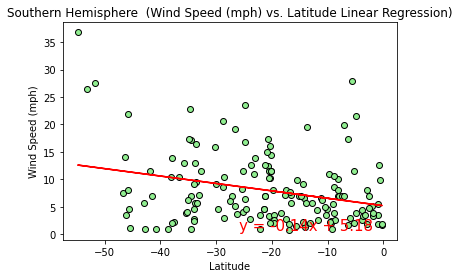

In [148]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Wind Speed (mph)'], 1, 1)